Information Gain for Age: 0.24674981977443933
Information Gain for Income: 0.02922256565895487
Information Gain for Student: 0.15183550136234159
Information Gain for Credit_Rating: 0.10224356360985076
The first feature to select for constructing the decision tree is: Age
The highest information gain is: 0.24674981977443933
Training Set Accuracy: 1.0
Test Set Accuracy: 1.0
The depth of the constructed Decision Tree is: 4


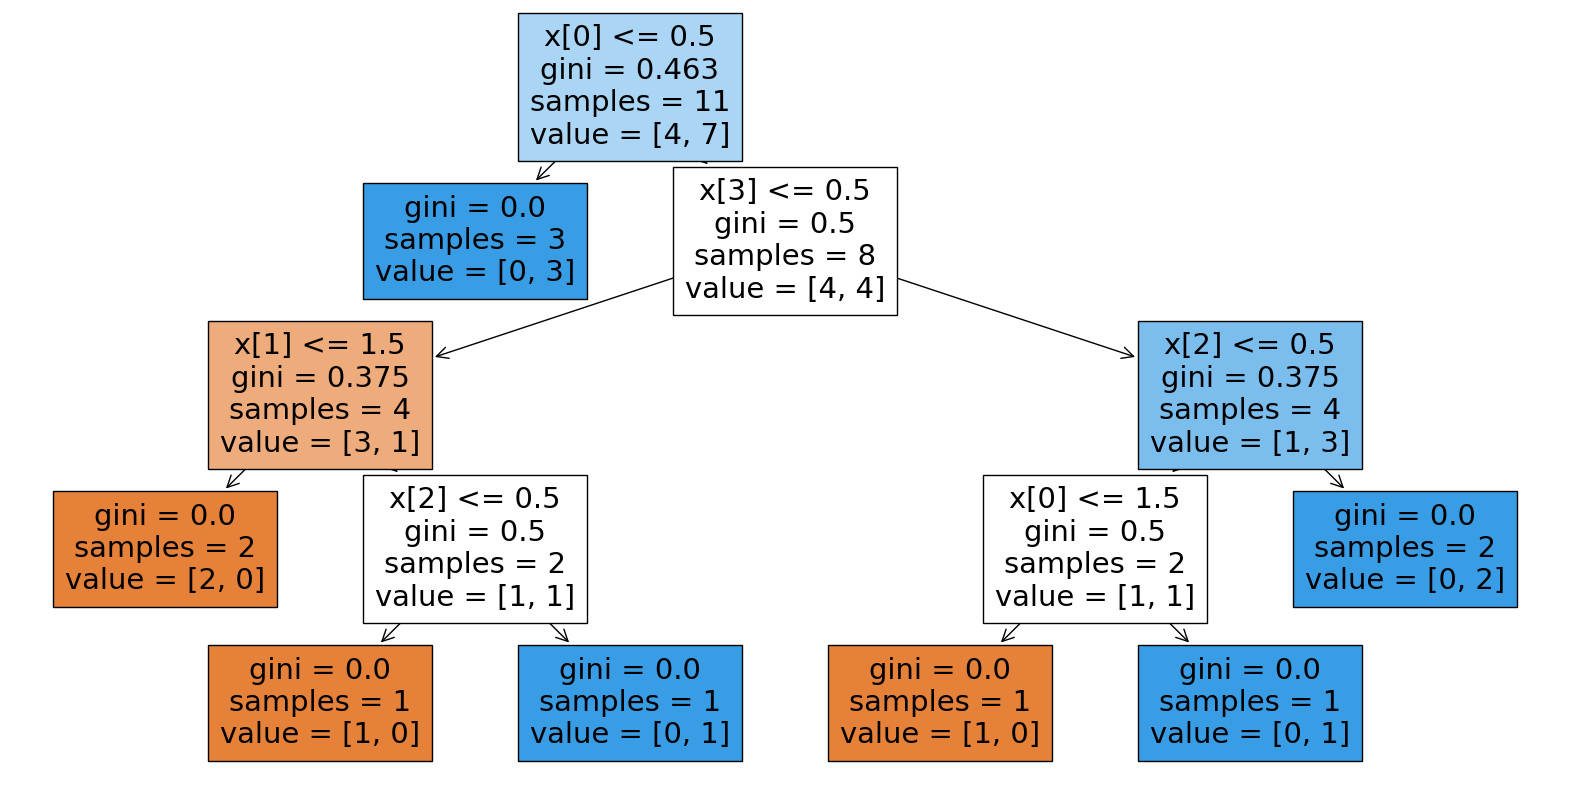

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Sample dataset (replace with your project data)
data = {
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'],
    'Credit_Rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Fair', 'Fair', 'Excellent'],
    'Buys_Computer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()

for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Separate features (X) and target (y)
X = df.drop(columns=['Buys_Computer'])
y = df['Buys_Computer']

# Split the data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate entropy
def calculate_entropy(data):
    class_labels = data.unique()
    entropy = 0
    total_instances = len(data)

    for label in class_labels:
        p = len(data[data == label]) / total_instances
        entropy -= p * np.log2(p)

    return entropy

# Function to calculate information gain
def calculate_information_gain(data, feature, target):
    entropy_before_split = calculate_entropy(target)
    total_instances = len(data)

    weighted_entropy_after_split = 0

    for value in data.unique():
        subset_indices = data[data == value].index
        subset_target = target[subset_indices]
        subset_instances = len(subset_indices)
        weighted_entropy_after_split += (subset_instances / total_instances) * calculate_entropy(subset_target)

    information_gain = entropy_before_split - weighted_entropy_after_split
    return information_gain

# Calculate entropy and information gain for each feature
features = X.columns  # Use the column names of X as features
information_gains = {}

for feature in features:
    information_gains[feature] = calculate_information_gain(X[feature], feature, y)
    print(f"Information Gain for {feature}: {information_gains[feature]}")

# Find the feature with the highest information gain (the root node)
root_node = max(information_gains, key=information_gains.get)

# Find the highest information gain
highestinfo_gain = max(information_gains.values())

print(f"The first feature to select for constructing the decision tree is: {root_node}")
print(f"The highest information gain is: {highestinfo_gain}")

# Create and fit the Decision Tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculate the accuracy on the training set
trainaccuracy = model.score(Tr_X, Tr_y)
print(f"Training Set Accuracy: {trainaccuracy}")

# Calculate the accuracy on the test set
testaccuracy = model.score(Te_X, Te_y)
print(f"Test Set Accuracy: {testaccuracy}")

# Calculate the depth of the constructed tree
treedepth = model.get_depth()
print(f"The depth of the constructed Decision Tree is: {treedepth}")

# Visualize the constructed tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True)
plt.show()



In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import datasets

# Load proj. data
# X, y = temp data,change data later tom

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier without max_depth constraint
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Training Set accuracy
train_accuracy = model.score(Tr_X, Tr_y)

# Test Set accuracy
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Plot the Decision Tree obtained
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
plot_tree(model, filled=True, feature_names=your_feature_names_here)
plt.show()

# Create a Decision Tree classifier with max_depth constraint
model_depth_5 = DecisionTreeClassifier(max_depth=5)
model_depth_5.fit(Tr_X, Tr_y)

# Training Set accuracy with max_depth constraint
train_accuracy_depth_5 = model_depth_5.score(Tr_X, Tr_y)

# Test Set accuracy with max_depth constraint
test_accuracy_depth_5 = model_depth_5.score(Te_X, Te_y)

print(f"Training Set Accuracy (max_depth=5): {train_accuracy_depth_5}")
print(f"Test Set Accuracy (max_depth=5): {test_accuracy_depth_5}")

# Change the criterion to "Entropy"
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(Tr_X, Tr_y)

# Training Set accuracy with "Entropy" criterion
train_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)

# Test Set accuracy with "Entropy" criterion
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)

print(f"Training Set Accuracy (Entropy criterion): {train_accuracy_entropy}")
print(f"Test Set Accuracy (Entropy criterion): {test_accuracy_entropy}")

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(Tr_X, Tr_y)

# Training Set accuracy with Random Forest
rf_train_accuracy = rf_model.score(Tr_X, Tr_y)

# Test Set accuracy with Random Forest
rf_test_accuracy = rf_model.score(Te_X, Te_y)

print(f"Training Set Accuracy (Random Forest): {rf_train_accuracy}")
print(f"Test Set Accuracy (Random Forest): {rf_test_accuracy}")


